File used for testing outputs and methods

In [224]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import os

In [225]:
#Function to read a specified excel file and sheet number
def readInData (fileName,sheet):
    current_dir = os.getcwd()
    file_dir = current_dir+fileName
    data = pd.read_excel(file_dir,sheet) #Reads in the specified sheet index from the data file
    clean = data.iloc[12::9,[0,3,7,11]] #Takes only the totals from each location and only the male, female and total pass %s 
    clean.columns = ['Location','Male%','Female%','Total%']
    clean = clean.drop(clean[clean['Male%'] == '..'].index)
    clean = clean.drop(clean[clean['Female%'] == '..'].index)
    clean = clean.drop(clean[clean['Total%'] == '..'].index)
    clean = clean.reset_index(drop=True) #Tidies up dataframe by correcting index values
    clean = clean.astype({'Male%':'float','Female%':'float','Total%':'float'})
    return clean

In [226]:
#Function to print max and min values for each column as a dataframe
def maxMinValuesReturnMonthly (df):
    maxMale = df[df['Male%']==df['Male%'].max()]
    maxMale['Index'] = 'maxMale'
    print(maxMale)
    temp = getLocationNames(df,maxMale)
    print(temp)
    maxMale['Location'] = temp
    minMale = df[df['Male%']==df['Male%'].min()]
    minMale['Index'] = 'minMale'
    maxFemale = df[df['Female%']==df['Female%'].max()]
    maxFemale['Index'] = 'maxFemale'
    minFemale = df[df['Female%']==df['Female%'].min()]
    minFemale['Index'] = 'minFemale'
    maxTotal = df[df['Total%']==df['Total%'].max()]
    maxTotal['Index'] = 'maxTotal'
    minTotal = df[df['Total%']==df['Total%'].min()]
    minTotal['Index'] = 'minTotal'
    rdf = pd.concat([maxMale,minMale,maxFemale,minFemale,maxTotal,minTotal],axis=0)
    rdf.set_index('Index', inplace = True)
    rdf = rdf.rename_axis(None)
    return rdf

In [227]:
#Function to get the geographical location of a row that has a max or min value
def getLocationNames (df,tofind):
    nums = tofind.index.tolist()
    print(nums)
    names = []
    for i in range(0,len(nums)):
        for j in range (0,13):
            print(nums[i]-j)
            if (df.loc[nums[i]-j]['Location']) == '':
                names.append((df.loc[nums[i]-j-1]['Location']))
    return names

In [228]:
#Function to print max and min values for each column as a dataframe
def maxMinValuesPrint (df):
    maxMale = df[df['Male%']==df['Male%'].max()]
    minMale = df[df['Male%']==df['Male%'].min()]
    maxFemale = df[df['Female%']==df['Female%'].max()]
    minFemale = df[df['Female%']==df['Female%'].min()]
    maxTotal = df[df['Total%']==df['Total%'].max()]
    minTotal = df[df['Total%']==df['Total%'].min()]
    print('Male Max:\n'+str(maxMale)+'\nMale Min:\n'+str(minMale)+'\nFemale Max:\n'+str(maxFemale)+'\nFemale Min:\n'+str(minFemale)+'\nTotal Max:\n'+str(maxTotal)+'\nTotal Min:\n'+str(minTotal))
    return

In [229]:
fileName = '/testcenterdata.xlsx'
y25 = readInData(fileName,2).copy(deep=True)
y24 = readInData(fileName,3).copy(deep=True)
y23 = readInData(fileName,4).copy(deep=True)
y22 = readInData(fileName,5).copy(deep=True)
y21 = readInData(fileName,6).copy(deep=True)
y20 = readInData(fileName,7).copy(deep=True)

In [230]:
y25c = maxMinValuesReturn(y25)
y24c = maxMinValuesReturn(y24)
y23c = maxMinValuesReturn(y23)
y22c = maxMinValuesReturn(y22)
y21c = maxMinValuesReturn(y21)
y20c = maxMinValuesReturn(y20)
y24c

                  Location  Male%  Female%  Total%    Index
94  Kyle of Lochalsh Total   70.0     60.0    64.0  maxMale
[94]
94
93
92
91
90
89
88
87
86
85
84
83
82
[]


ValueError: Length of values (0) does not match length of index (1)

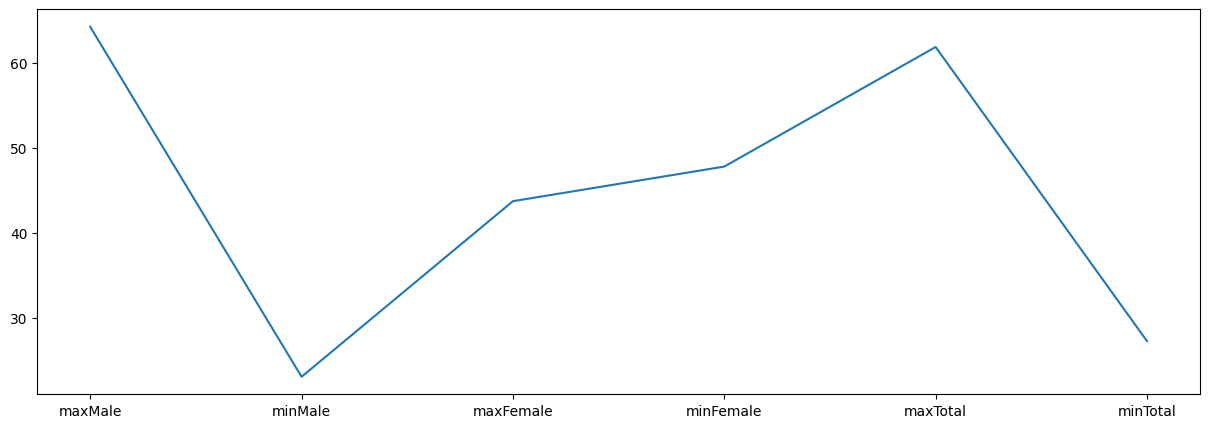

In [69]:
#Creating first plot
fig,ax = plt.subplots(figsize=(15,5))
ax = plt.plot(y24c['Male%']) 